In [6]:
import pandas as pd
# file name 합치기
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from sklearn.model_selection import train_test_split
# 시각화
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from skimage import io, feature
from skimage.transform import resize
import cv2
from PIL import ImageChops
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# 다중 회귀분석
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [7]:
import seaborn as sns

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [8]:
생육데이터 = pd.read_excel("./Data/사전테스트-생육데이터.xlsx")

In [9]:
생육데이터.head()

,시설아이디,생육주사,조사일자,표본번호,조사항목,단위,조사항목값
0,B농가,4,20231006,1,초장,mm,255.0
1,B농가,4,20231006,1,엽장,mm,79.0
2,B농가,4,20231006,1,엽폭,mm,70.0
3,B농가,4,20231006,1,엽병장,mm,139.0
4,B농가,4,20231006,1,엽수,개,5.0


In [40]:
생육데이터.tail()

,시설아이디,생육주사,조사일자,표본번호,조사항목,단위,조사항목값
9868,E농가,32,20240426,9,엽수,개,8.0
9869,E농가,32,20240426,9,관부직경,mm,27.9
9870,E농가,32,20240426,9,화방 꽃수(소화수),개,0.0
9871,E농가,32,20240426,9,착과수,개,0.0
9872,E농가,32,20240426,9,최종화방차수,차,3.0


In [69]:
환경B = pd.read_csv("./Data/사전테스트-환경데이터/environmentsB.csv")

In [10]:
환경B = pd.read_csv("./Data/사전테스트-환경데이터/environmentsB.csv")
환경C = pd.read_csv("./Data/사전테스트-환경데이터/environmentsC.csv")
환경D = pd.read_csv("./Data/사전테스트-환경데이터/environmentsD.csv")
환경E = pd.read_csv("./Data/사전테스트-환경데이터/environmentsE.csv")


In [11]:
전체환경 = pd.concat([환경B, 환경C,환경D,환경E], ignore_index=True)

In [12]:
전체환경

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,B농가,2023-09-21 18:00,0.4,6.0,511.60,92.20,18.00,144.60
1,B농가,2023-09-21 19:00,1.0,6.0,517.83,94.67,17.67,0.00
2,B농가,2023-09-21 20:00,1.0,6.0,526.83,97.67,16.67,0.00
3,B농가,2023-09-21 21:00,1.0,6.0,532.67,98.17,16.00,0.00
4,B농가,2023-09-21 22:00,1.0,6.0,540.17,97.50,15.33,0.00
...,...,...,...,...,...,...,...,...
17451,E농가,2024-04-26 19:00,0.0,6.0,287.09,62.90,23.20,75.07
17452,E농가,2024-04-26 20:00,0.0,6.0,330.85,67.27,20.88,79.33
17453,E농가,2024-04-26 21:00,0.0,6.0,356.48,68.93,19.61,82.90
17454,E농가,2024-04-26 22:00,0.0,6.0,386.59,69.66,18.47,91.01


In [13]:
환경B

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,B농가,2023-09-21 18:00,0.4,6.0,511.60,92.20,18.00,144.60
1,B농가,2023-09-21 19:00,1.0,6.0,517.83,94.67,17.67,0.00
2,B농가,2023-09-21 20:00,1.0,6.0,526.83,97.67,16.67,0.00
3,B농가,2023-09-21 21:00,1.0,6.0,532.67,98.17,16.00,0.00
4,B농가,2023-09-21 22:00,1.0,6.0,540.17,97.50,15.33,0.00
...,...,...,...,...,...,...,...,...
4735,B농가,2024-04-24 19:00,1.0,6.0,638.67,100.00,11.50,1.67
4736,B농가,2024-04-24 20:00,1.0,6.0,441.33,100.00,10.17,0.00
4737,B농가,2024-04-24 21:00,1.0,6.0,214.67,100.00,10.50,0.00
4738,B농가,2024-04-24 22:00,1.0,6.0,212.00,100.00,10.67,0.00


<div>
<h1>
환경 데이터셋 컬럼 정의
</h1>
<h3>
- farm : 농가  <br>
- datetime : 측정 시간 (단위 1시간) <br>
- supplyEC : 토양의 양분 농도, 많을수록 작물이 먹을 수 있는 양분이 많음을 의미 <br>
- supplyPH : PH 농도 <br>
- innerCO2 : 내부 이산화탄소 <br>
- innerHum : 내부 습도 <br>
- innerTemp : 내부 온도 <br>
- innerSolar : 내부 일사량 
</h3>
</div>

## 생육 데이터 체크

In [14]:
농가B = 생육데이터[생육데이터["시설아이디"] == "B농가"]

In [15]:
추가컬럼 = 농가B["조사항목"].unique()

In [16]:
농가B['표본번호']

0       1
1       1
2       1
3       1
4       1
       ..
2416    9
2417    9
2418    9
2419    9
2420    9
Name: 표본번호, Length: 2421, dtype: int64

In [17]:
농가B.head(20)

,시설아이디,생육주사,조사일자,표본번호,조사항목,단위,조사항목값
0,B농가,4,20231006,1,초장,mm,255.00
1,B농가,4,20231006,1,엽장,mm,79.00
2,B농가,4,20231006,1,엽폭,mm,70.00
3,B농가,4,20231006,1,엽병장,mm,139.00
4,B농가,4,20231006,1,엽수,개,5.00
5,B농가,4,20231006,1,관부직경,mm,12.39
6,B농가,4,20231006,1,화방 꽃수(소화수),개,0.00
7,B농가,4,20231006,1,착과수,개,0.00
8,B농가,4,20231006,1,최종화방차수,차,0.00
9,B농가,4,20231006,2,초장,mm,251.00


In [18]:
단위 = 농가B["단위"]

In [19]:
단위

0       mm
1       mm
2       mm
3       mm
4        개
        ..
2416     개
2417    mm
2418     개
2419     개
2420     차
Name: 단위, Length: 2421, dtype: object

In [20]:
농가B

,시설아이디,생육주사,조사일자,표본번호,조사항목,단위,조사항목값
0,B농가,4,20231006,1,초장,mm,255.00
1,B농가,4,20231006,1,엽장,mm,79.00
2,B농가,4,20231006,1,엽폭,mm,70.00
3,B농가,4,20231006,1,엽병장,mm,139.00
4,B농가,4,20231006,1,엽수,개,5.00
...,...,...,...,...,...,...,...
2416,B농가,33,20240424,9,엽수,개,11.00
2417,B농가,33,20240424,9,관부직경,mm,21.65
2418,B농가,33,20240424,9,화방 꽃수(소화수),개,1.00
2419,B농가,33,20240424,9,착과수,개,2.00


In [21]:
data = 농가B.iloc[:,0:4]

In [22]:
data['생육주사'].unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [23]:
data

,시설아이디,생육주사,조사일자,표본번호
0,B농가,4,20231006,1
1,B농가,4,20231006,1
2,B농가,4,20231006,1
3,B농가,4,20231006,1
4,B농가,4,20231006,1
...,...,...,...,...
2416,B농가,33,20240424,9
2417,B농가,33,20240424,9
2418,B농가,33,20240424,9
2419,B농가,33,20240424,9


In [24]:
29 * 9

261

In [25]:
data2 = data.groupby('표본번호')

In [26]:
data2

In [27]:
추가컬럼

array(['초장', '엽장', '엽폭', '엽병장', '엽수', '관부직경', '화방 꽃수(소화수)', '착과수',
       '최종화방차수'], dtype=object)

## 환경데이터

In [28]:
환경B

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,B농가,2023-09-21 18:00,0.4,6.0,511.60,92.20,18.00,144.60
1,B농가,2023-09-21 19:00,1.0,6.0,517.83,94.67,17.67,0.00
2,B농가,2023-09-21 20:00,1.0,6.0,526.83,97.67,16.67,0.00
3,B농가,2023-09-21 21:00,1.0,6.0,532.67,98.17,16.00,0.00
4,B농가,2023-09-21 22:00,1.0,6.0,540.17,97.50,15.33,0.00
...,...,...,...,...,...,...,...,...
4735,B농가,2024-04-24 19:00,1.0,6.0,638.67,100.00,11.50,1.67
4736,B농가,2024-04-24 20:00,1.0,6.0,441.33,100.00,10.17,0.00
4737,B농가,2024-04-24 21:00,1.0,6.0,214.67,100.00,10.50,0.00
4738,B농가,2024-04-24 22:00,1.0,6.0,212.00,100.00,10.67,0.00


In [29]:
test = 환경B.drop(columns={"farm","datetime"})

In [30]:
환경B_하루 = 환경B.loc[6:28]

In [31]:
te = 환경B.drop(columns={"farm","datetime"})

In [32]:
환경B_하루

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
6,B농가,2023-09-22 00:00,1.0,6.0,543.17,97.00,15.00,0.00
7,B농가,2023-09-22 01:00,1.0,6.0,543.33,97.50,15.00,0.00
8,B농가,2023-09-22 02:00,1.0,6.0,544.00,96.83,15.00,0.00
9,B농가,2023-09-22 03:00,1.0,6.0,546.50,97.33,14.67,0.00
10,B농가,2023-09-22 04:00,1.0,6.0,551.50,97.00,14.00,0.00
11,B농가,2023-09-22 05:00,1.0,6.0,552.67,96.67,14.00,0.00
12,B농가,2023-09-22 06:00,1.0,6.0,551.00,96.83,14.33,3.33
13,B농가,2023-09-22 07:00,1.0,6.0,541.83,97.17,14.83,30.33
14,B농가,2023-09-22 08:00,1.0,6.0,528.33,91.50,16.33,104.33
15,B농가,2023-09-22 09:00,1.0,6.0,517.75,89.50,17.50,140.75


In [33]:
전체환경.drop(columns={"farm","datetime"})

,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,0.4,6.0,511.60,92.20,18.00,144.60
1,1.0,6.0,517.83,94.67,17.67,0.00
2,1.0,6.0,526.83,97.67,16.67,0.00
3,1.0,6.0,532.67,98.17,16.00,0.00
4,1.0,6.0,540.17,97.50,15.33,0.00
...,...,...,...,...,...,...
17451,0.0,6.0,287.09,62.90,23.20,75.07
17452,0.0,6.0,330.85,67.27,20.88,79.33
17453,0.0,6.0,356.48,68.93,19.61,82.90
17454,0.0,6.0,386.59,69.66,18.47,91.01


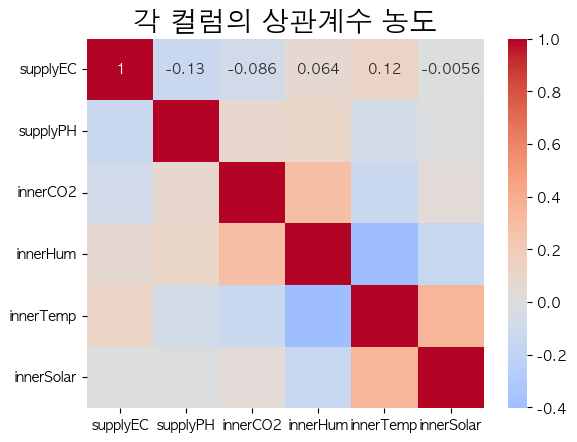

In [34]:
sns.heatmap(전체환경.drop(columns={"farm","datetime"}).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('각 컬럼의 상관계수 농도',size=20)
plt.show()

In [35]:
전체환경

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,B농가,2023-09-21 18:00,0.4,6.0,511.60,92.20,18.00,144.60
1,B농가,2023-09-21 19:00,1.0,6.0,517.83,94.67,17.67,0.00
2,B농가,2023-09-21 20:00,1.0,6.0,526.83,97.67,16.67,0.00
3,B농가,2023-09-21 21:00,1.0,6.0,532.67,98.17,16.00,0.00
4,B농가,2023-09-21 22:00,1.0,6.0,540.17,97.50,15.33,0.00
...,...,...,...,...,...,...,...,...
17451,E농가,2024-04-26 19:00,0.0,6.0,287.09,62.90,23.20,75.07
17452,E농가,2024-04-26 20:00,0.0,6.0,330.85,67.27,20.88,79.33
17453,E농가,2024-04-26 21:00,0.0,6.0,356.48,68.93,19.61,82.90
17454,E농가,2024-04-26 22:00,0.0,6.0,386.59,69.66,18.47,91.01


In [43]:
전체환경2 = 전체환경.copy()

In [59]:
전체환경

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,B농가,2023-09-21 18:00,0.4,6.0,511.60,92.20,18.00,144.60
1,B농가,2023-09-21 19:00,1.0,6.0,517.83,94.67,17.67,0.00
2,B농가,2023-09-21 20:00,1.0,6.0,526.83,97.67,16.67,0.00
3,B농가,2023-09-21 21:00,1.0,6.0,532.67,98.17,16.00,0.00
4,B농가,2023-09-21 22:00,1.0,6.0,540.17,97.50,15.33,0.00
...,...,...,...,...,...,...,...,...
17451,E농가,2024-04-26 19:00,0.0,6.0,287.09,62.90,23.20,75.07
17452,E농가,2024-04-26 20:00,0.0,6.0,330.85,67.27,20.88,79.33
17453,E농가,2024-04-26 21:00,0.0,6.0,356.48,68.93,19.61,82.90
17454,E농가,2024-04-26 22:00,0.0,6.0,386.59,69.66,18.47,91.01


In [75]:
환경B.head(30)

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,B농가,2023-09-21 18:00,0.4,6.0,511.60,92.20,18.00,144.60
1,B농가,2023-09-21 19:00,1.0,6.0,517.83,94.67,17.67,0.00
2,B농가,2023-09-21 20:00,1.0,6.0,526.83,97.67,16.67,0.00
3,B농가,2023-09-21 21:00,1.0,6.0,532.67,98.17,16.00,0.00
4,B농가,2023-09-21 22:00,1.0,6.0,540.17,97.50,15.33,0.00
5,B농가,2023-09-21 23:00,1.0,6.0,548.33,97.33,14.67,0.00
6,B농가,2023-09-22 00:00,1.0,6.0,543.17,97.00,15.00,0.00
7,B농가,2023-09-22 01:00,1.0,6.0,543.33,97.50,15.00,0.00
8,B농가,2023-09-22 02:00,1.0,6.0,544.00,96.83,15.00,0.00
9,B농가,2023-09-22 03:00,1.0,6.0,546.50,97.33,14.67,0.00


In [71]:
환경B3 = 환경B.copy()

In [72]:
# 1. 'datetime' 열을 datetime 형식으로 변환
환경B3['datetime'] = pd.to_datetime(환경B3['datetime'])

# 2. 'datetime' 열에서 주차(Week) 및 연도(Year) 계산
환경B3['Year'] = 환경B3['datetime'].dt.year
환경B3['Week'] = 환경B3['datetime'].dt.isocalendar().week

# 3. 주차와 연도를 기준으로 그룹화하고 집계 함수 적용
grouped = 환경B3.groupby(['Year', 'Week']).agg({
    'supplyEC': 'mean',          # 주차별 평균 supplyEC
    'supplyPH': 'mean',          # 주차별 평균 supplyPH
    'innerCO2': 'mean',          # 주차별 평균 innerCO2
    'innerHum': 'mean',          # 주차별 평균 innerHum
    'innerTemp': 'mean',         # 주차별 평균 innerTemp
    'innerSolar': 'mean'         # 주차별 평균 innerSolar
}).reset_index()

In [73]:
환경B3

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,Year,Week
0,B농가,2023-09-21 18:00:00,0.4,6.0,511.60,92.20,18.00,144.60,2023,38
1,B농가,2023-09-21 19:00:00,1.0,6.0,517.83,94.67,17.67,0.00,2023,38
2,B농가,2023-09-21 20:00:00,1.0,6.0,526.83,97.67,16.67,0.00,2023,38
3,B농가,2023-09-21 21:00:00,1.0,6.0,532.67,98.17,16.00,0.00,2023,38
4,B농가,2023-09-21 22:00:00,1.0,6.0,540.17,97.50,15.33,0.00,2023,38
...,...,...,...,...,...,...,...,...,...,...
4735,B농가,2024-04-24 19:00:00,1.0,6.0,638.67,100.00,11.50,1.67,2024,17
4736,B농가,2024-04-24 20:00:00,1.0,6.0,441.33,100.00,10.17,0.00,2024,17
4737,B농가,2024-04-24 21:00:00,1.0,6.0,214.67,100.00,10.50,0.00,2024,17
4738,B농가,2024-04-24 22:00:00,1.0,6.0,212.00,100.00,10.67,0.00,2024,17


In [68]:
환경B2 = 환경B.copy()

In [36]:
환경B["supplyEC"].unique()

array([0.4 , 1.  , 0.17, 0.  , 0.67, 0.33, 0.83, 2.  , 1.5 , 1.17, 0.5 ,
       1.1 , 1.2 , 1.3 , 1.23, 1.25, 1.27, 1.26, 1.15, 1.18, 1.4 , 1.33,
       0.6 , 0.75, 0.9 , 1.03, 1.14, 1.28, 1.08, 1.12])

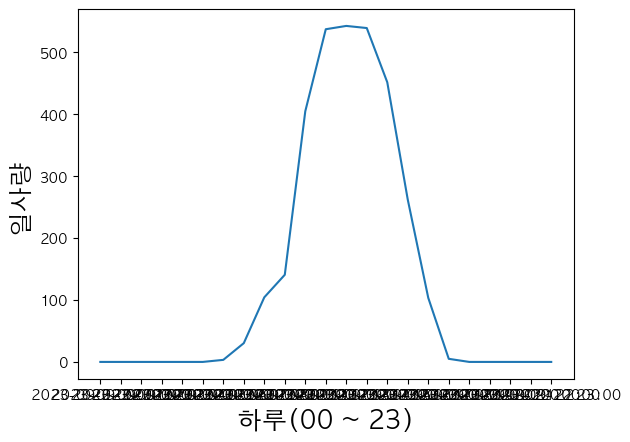

In [37]:
plt.plot(환경B_하루["datetime"],환경B_하루["innerSolar"])
plt.xlabel('하루(00 ~ 23)',size=18)
plt.ylabel('일사량 ',size=18)
plt.show()

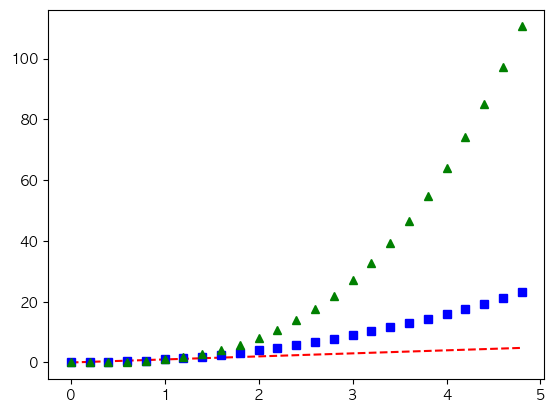

In [39]:

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()